# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image, display
from pathlib import Path

# Imports for this notebook
import matplotlib.pyplot as plt

# Jupyter plotting magic and defaults
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Show full content of each cell (no truncation of long strings)
pd.set_option('display.max_colwidth', None)

# Now when you print or display the dataframe, it will show everything

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [15]:
# Read colors.csv and count unique color names
colors = pd.read_csv(Path("data/colors.csv"))
print("Unique colours (by name):", colors["name"].nunique())

# Optional: show unique counts per column
print("\nUnique counts per column:\n", colors.nunique())

Unique colours (by name): 135

Unique counts per column:
 id          135
name        135
rgb         124
is_trans      2
dtype: int64


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [16]:
# Method 1: use value_counts()
counts_vc = colors["is_trans"].value_counts()
print("Method 1 - value_counts():")
print(counts_vc)

# Method 2: boolean masks and sum
num_trans = (colors["is_trans"] == "t").sum()
num_opaque = (colors["is_trans"] == "f").sum()
print("\nMethod 2 - boolean masks:")
print("Transparent (is_trans == 't'):", num_trans)
print("Opaque (is_trans == 'f'):", num_opaque)

# Sanity check: both methods should agree
assert counts_vc.get("t", 0) == num_trans and counts_vc.get("f", 0) == num_opaque

Method 1 - value_counts():
is_trans
f    107
t     28
Name: count, dtype: int64

Method 2 - boolean masks:
Transparent (is_trans == 't'): 28
Opaque (is_trans == 'f'): 107


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

In [17]:
display(Image(url='https://i.imgur.com/aKcwkSx.png'))

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

In [18]:
display(Image(url='https://i.imgur.com/whB1olq.png'))

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [19]:
# Read sets.csv and examine first and last rows
sets = pd.read_csv(Path("data/sets.csv"))
print("First few rows:")
print(sets.head())
print("\nLast few rows:")
print(sets.tail())
print("\nDataFrame info:")
print(sets.info())
# display vs print to show the difference. why use print instead of display?
# Use display() (or simply output the variable at the end of a cell) for DataFrames and Series. It renders interactive, readable HTML tables.
# Use print() for debugging strings, raw text, or logging, or when you specifically need the ASCII string representation of the data.
display(sets.head())
display(sets.tail())
display(sets.info())

First few rows:
  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

Last few rows:
           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  

DataFrame in

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


None

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [20]:
# Find the first year LEGO sets were released
first_year = sets['year'].min()
print(f"First year LEGO sets were released: {first_year}")

# Get all sets from the first year
first_year_sets = sets[sets['year'] == first_year]
print(f"\nLEGO sets released in {first_year}:")
print(first_year_sets[['set_num', 'name', 'year', 'num_parts']])

First year LEGO sets were released: 1949

LEGO sets released in 1949:
      set_num                               name  year  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949        142
9534  700.2-1               Large Gift Set (ABB)  1949        178
9539  700.3-1              Medium Gift Set (ABB)  1949        142
9544  700.A-1              Small Brick Set (ABB)  1949         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949         12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [21]:
# Count unique sets in the first year
num_sets_first_year = first_year_sets['set_num'].nunique()
print(f"Number of different sets sold in {first_year}: {num_sets_first_year}")

# Count unique themes in the first year
num_themes_first_year = first_year_sets['theme_id'].nunique()
print(f"Number of different themes on offer in {first_year}: {num_themes_first_year}")

Number of different sets sold in 1949: 5
Number of different themes on offer in 1949: 2


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [22]:
# Find the top 5 LEGO sets with the most number of parts
top_5_sets = sets.nlargest(5, 'num_parts')[['set_num', 'name', 'year', 'num_parts']]
print("Top 5 LEGO sets with the most parts:")
display(top_5_sets)

Top 5 LEGO sets with the most parts:


,set_num,name,year,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,9987
11183,75192-1,UCS Millennium Falcon,2017,7541
10551,71043-1,Hogwarts Castle,2018,6020
295,10256-1,Taj Mahal,2017,5923
221,10189-1,Taj Mahal,2008,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [23]:
# Group by year and count the number of sets released each year
sets_per_year = sets.groupby('year').count()['set_num']
print("Number of LEGO sets released year-on-year:")
print(sets_per_year)

# Compare 1955 to 2019
print(f"\nSets released in 1955: {sets_per_year.get(1955, 0)}")
print(f"Sets released in 2019: {sets_per_year.get(2019, 0)}")

Number of LEGO sets released year-on-year:
year
1949      5
1950      6
1953      4
1954     14
1955     28
1956     13
1957     20
1958     46
1959      4
1960      3
1961     22
1962     41
1963     20
1964     18
1965     13
1966    111
1967     28
1968     39
1969     81
1970     37
1971     51
1972     39
1973     70
1974     39
1975     39
1976     76
1977     99
1978     78
1979     92
1980    102
1981     84
1982     84
1983     73
1984     95
1985    168
1986    159
1987    233
1988     80
1989    134
1990    108
1991    148
1992    135
1993    137
1994    164
1995    175
1996    198
1997    255
1998    381
1999    340
2000    367
2001    383
2002    504
2003    441
2004    395
2005    351
2006    313
2007    315
2008    341
2009    421
2010    435
2011    503
2012    607
2013    605
2014    690
2015    774
2016    757
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

Sets released in 1955: 28
Sets released in 2019: 840


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
*Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.*

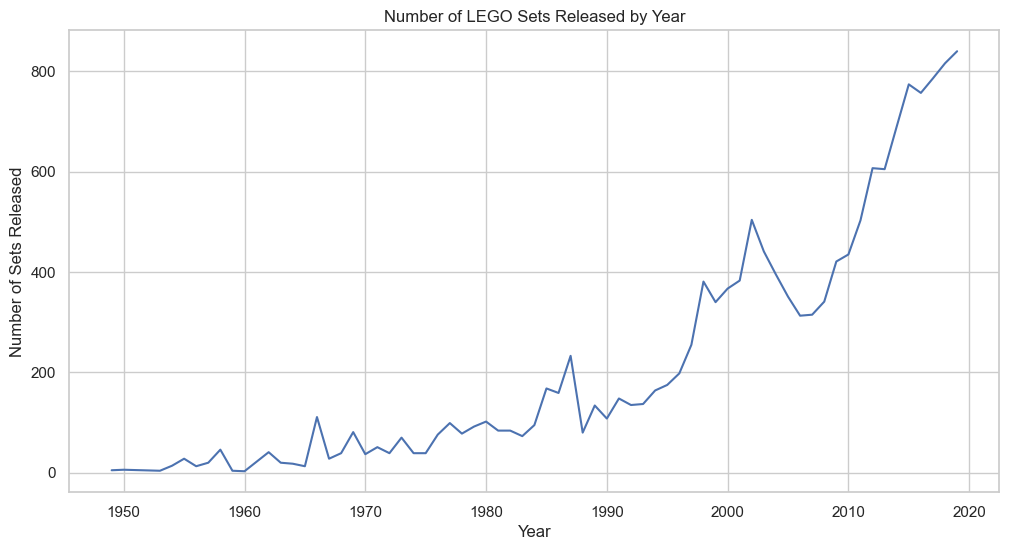

In [24]:
# Create a line chart showing the number of LEGO sets released year-on-year
# Exclude 2020 and 2021 to show only full calendar years
sets_per_year[:-2].plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.title('Number of LEGO Sets Released by Year')
plt.grid(True)
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [25]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id': 'unique_themes'}, inplace=True)
print(themes_by_year)

      unique_themes
year               
1949              2
1950              1
1953              2
1954              2
1955              4
1956              3
1957              4
1958              3
1959              3
1960              3
1961              6
1962              4
1963              8
1964              9
1965              8
1966             13
1967             12
1968             16
1969             18
1970             18
1971             14
1972             13
1973             17
1974             14
1975             15
1976             26
1977             22
1978             25
1979             20
1980             32
1981             26
1982             24
1983             29
1984             30
1985             45
1986             44
1987             36
1988             37
1989             37
1990             39
1991             46
1992             45
1993             45
1994             50
1995             55
1996             60
1997             62
1998             85


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

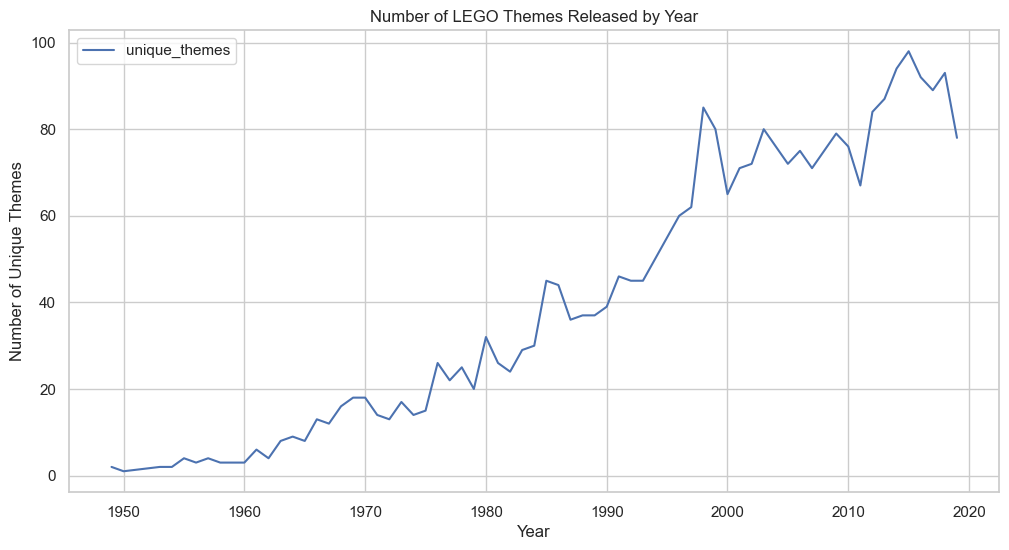

In [26]:
# Plot the number of themes released by year (excluding 2020 and 2021)
themes_by_year[:-2].plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Unique Themes')
plt.title('Number of LEGO Themes Released by Year')
plt.grid(True)
plt.show()

### Line Charts with Two Separate Axes


**Challenge:** build a dual line chart showing the number of sets per year AND the number of themes per year on a separate y axis, with distinct line colors, but sharing the same x axis 

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [30]:
# Calculate average number of parts per set by year
avg_parts_per_year = sets.groupby('year').agg({'num_parts': 'mean'})

print("Average number of parts per LEGO set by year:")
print(avg_parts_per_year)

# Compare 1954 to 2017
avg_1954 = avg_parts_per_year.loc[1954, 'num_parts']
avg_2017 = avg_parts_per_year.loc[2017, 'num_parts']

print(f"\nAverage parts in 1954: {avg_1954:.2f}")
print(f"Average parts in 2017: {avg_2017:.2f}")
print(f"Difference: {avg_2017 - avg_1954:.2f} parts")

Average number of parts per LEGO set by year:
       num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
1956   18.923077
1957   44.750000
1958   41.130435
1959   16.250000
1960  175.333333
1961   58.227273
1962   79.975610
1963   47.000000
1964   79.166667
1965   86.000000
1966   46.729730
1967  121.750000
1968  116.435897
1969   74.641975
1970   81.675676
1971   77.196078
1972  100.769231
1973  101.800000
1974  116.948718
1975  127.948718
1976  142.381579
1977   87.626263
1978  138.602564
1979   97.228261
1980  112.794118
1981   93.011905
1982   65.547619
1983   93.821918
1984   77.736842
1985  105.589286
1986   94.226415
1987   65.120172
1988  129.587500
1989   91.111940
1990  163.287037
1991  130.918919
1992  104.688889
1993  124.065693
1994  106.146341
1995  141.560000
1996  154.808081
1997  112.552941
1998  132.506562
1999  100.929412
2000   97.948229
2001   97.634465
2002  107.309524
2003  157.068027
2004  141.551899
20

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

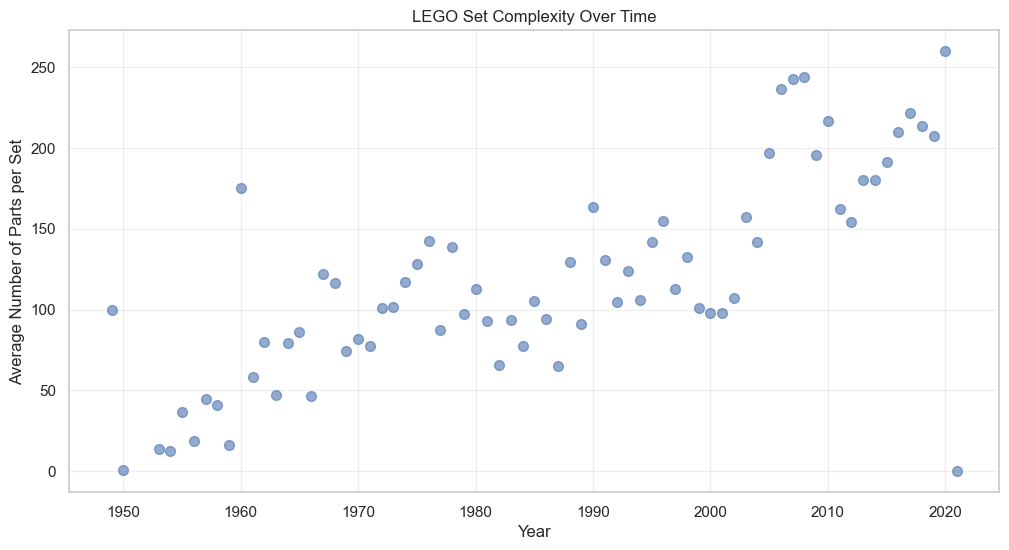

In [31]:
# Create a scatter plot showing average number of parts per set over time
plt.figure(figsize=(12, 6))
plt.scatter(avg_parts_per_year.index, avg_parts_per_year['num_parts'], alpha=0.6, s=50)
plt.xlabel('Year')
plt.ylabel('Average Number of Parts per Set')
plt.title('LEGO Set Complexity Over Time')
plt.grid(True, alpha=0.3)
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<!-- use HTML to display the image -->
<img src='https://i.imgur.com/Sg4lcjx.png' alt="database schema for LEGO data source">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key
